# Predicting With CIFAR-10 Saved Model

### Imports

In [1]:
import numpy as np
import scipy.misc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD
from PIL import Image
import matplotlib.pyplot as plt

### Load Model

In [2]:
model_architecture = 'model.json'
model_weights = 'model.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

### Load Images

In [3]:
img_names = [Image.open('cat-predict.jpeg'),Image.open('dog-predict.jpg')]
imgs = [np.transpose((np.asarray(img_name.resize((32,32)))),(1,0,2)).astype('float32') for img_name in img_names]
imgs = np.array(imgs)/255

### Train

In [4]:
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer= optim, metrics=['accuracy'])

### Predict

In [5]:
categories = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck",
}

1/1 [==============================] - 0s 39ms/step


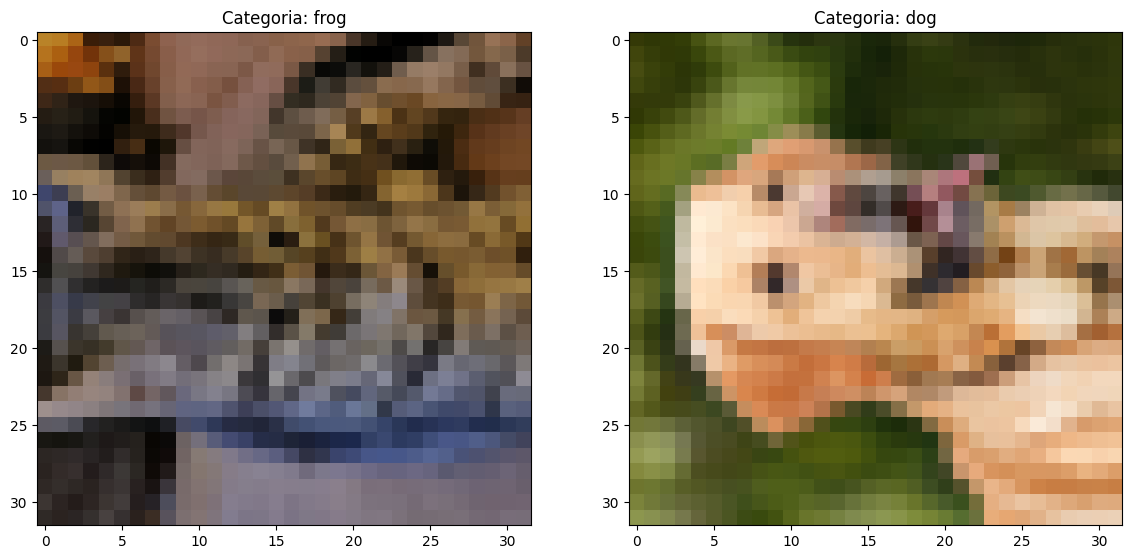

In [25]:
predictions = model.predict(imgs)
predictions_classes=np.argmax(predictions,axis=1)

def label():
    name_categ = [categories[categ] for categ in predictions_classes]
    return name_categ

fig = plt.figure(figsize=(14,10))
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    image = plt.title(f"Categoria: {label()[i]}")
    image = plt.imshow(imgs[i])